In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

import warnings
warnings.filterwarnings('ignore')

C:\Users\wwwaz\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# For importing digits dataset inbuilt in keras 
(X_train,y_train),(X_test,y_test )= keras.datasets.mnist.load_data()  #important to put brackets

In [3]:
X_test.shape

(10000, 28, 28)

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
y_test.shape

(10000,)

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

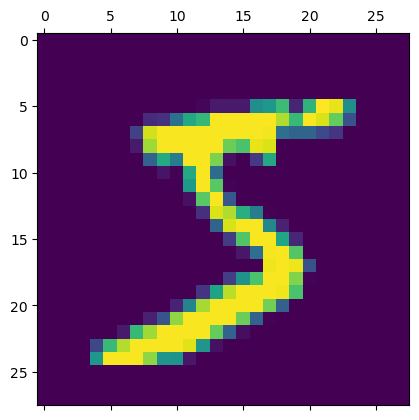

In [8]:
plt.matshow(X_train[0])

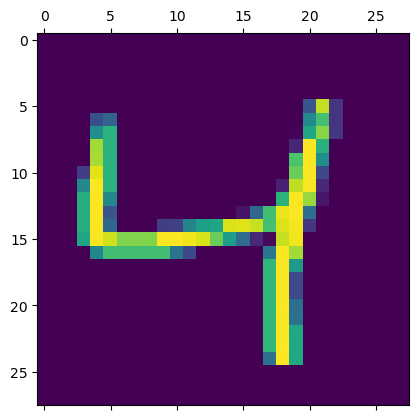

In [9]:
plt.matshow(X_train[2])

In [10]:
X_train.shape  #dekho x train ka data 2d array hai to isku 1D array banana padhta/Flattened karna padhta

(60000, 28, 28)

In [11]:
# Lekin aap dekh sakte array 0 se 255 ke bichme kaisa bhi range me hai. To niche accuracy kam ari thi 
# Agar apan isku scale kardinge to accuracy badhjaingi
# Scale karneke liye har element ku jo sabse highest number hai usse divide kardena to wo 0 se 1 ke bichme scale hojate
X_train =X_train/255
X_test =X_test/255

In [12]:
y_train[:5]  # Yaha humku ye pata chala ke op me 10 layer hai magar iska reason nhi mlm kaise

array([5, 0, 4, 1, 9], dtype=uint8)

In [13]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [14]:
X_train_flattened = X_train.reshape(len(X_train),28*28) #flattened karneke liye reshape fun use hota.Ab dekho array ka shape 28*28=784 hogya hunga.
#Yani 2 Column ke array ab 1 column me ajainge
X_train_flattened.shape

(60000, 784)

In [18]:
X_test_flattened = X_test.reshape(len(X_test),28*28)
X_test_flattened.shape                                       

(10000, 784)

In [16]:
# Yahape hum neural network banare basic sa
# iski image ye path me hai  "C:\\Users\\wwwaz\\OneDrive\\Pictures\\Screenshots\\Screenshot (65)
model = keras.Sequential([  # Ye function layers ka stack banane use hota.Layers jo NN me rehte.
     keras.layers.Dense(10,input_shape=(784,),activation='sigmoid') # dense matlab har element o/p layer se connect hai
                                                                 # output layer me 10 elements hai(1 to 10 handrwritten digits)
                                                                #input layer jo hai usme 784 elements hai
                                                               #activation function apan sigmoid use karre jo best fit line banata
])
model.compile( # neural network ko compile karna padhta hamesha
    optimizer = 'adam', # ye bas achese train larne ke liye model ko use hota
    loss = 'sparse_categorical_crossentropy',  # Jaisa apan error proportion ke liye classifivcation data me mean squared error use karte waisi koi dusra loss function hai ye
    metrics = ['accuracy']
) 
model.fit(X_train_flattened,y_train,epochs=5) # Yha hum training kar rhe hai , epochs is used to  number of times nn repeat hoga or run karega

Epoch 1/5
1875/1875 [==============================] - 14s 5ms/step - loss: 0.4635 - accuracy: 0.8788
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3036 - accuracy: 0.9152
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2830 - accuracy: 0.9206
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2728 - accuracy: 0.9246
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2667 - accuracy: 0.9253


In [20]:
model.evaluate(X_test_flattened,y_test) # yahape model ku test karre apan

313/313 [==============================] - 3s 4ms/step - loss: 0.2645 - accuracy: 0.9268


[0.2644925117492676, 0.926800012588501]

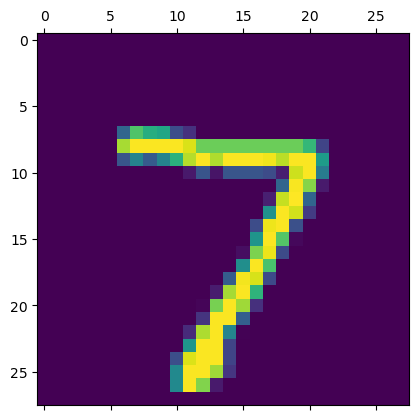

In [23]:
# yaha aisi maze ke liye predict karre ke apna model kam karra kya sahi se
plt.matshow(X_test[0])

In [25]:
y_prediction = model.predict(X_test_flattened)

313/313 [==============================] - 2s 4ms/step


In [29]:
y_prediction[0]  # Yhape ye puri aqri layer/op layer ke scores print karra das ke das elements ka score

array([2.81175952e-02, 2.38739119e-07, 5.87828346e-02, 9.66171205e-01,
       2.14150618e-03, 1.25205129e-01, 1.72627222e-06, 9.99756336e-01,
       1.03074536e-01, 6.83935285e-01], dtype=float32)

In [30]:
# Abhi humku sirf jo maximum score wala element hai wo print karneka to numpy ka function use karinge
np.argmax(y_prediction[0])

7

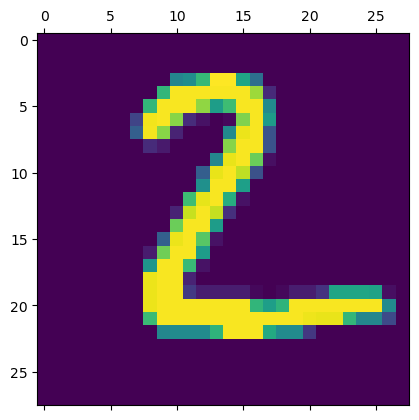

In [31]:
plt.matshow(X_test[1])

In [32]:
y_prediction[1]
np.argmax(y_prediction[1])

2

In [34]:
y_predicted_labels = [np.argmax(i)for i in y_prediction] # Sare elements pe argmax lagane
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [36]:
cm = tf.math.confusion_matrix(y_test,y_predicted_labels)
cm   # Yaha confusion matrix banare apan

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 959,    0,    2,    2,    0,    5,    8,    2,    2,    0],
       [   0, 1117,    3,    2,    0,    1,    4,    2,    6,    0],
       [   4,    9,  933,   15,    7,    3,   10,   10,   37,    4],
       [   1,    0,   23,  927,    1,   20,    2,    8,   21,    7],
       [   1,    1,    3,    2,  914,    0,   11,    4,    9,   37],
       [   8,    2,    4,   44,   10,  766,   15,    5,   31,    7],
       [   8,    3,    7,    1,    8,    9,  918,    2,    2,    0],
       [   1,    5,   20,   10,    8,    0,    0,  941,    3,   40],
       [   6,    8,    7,   25,    9,   26,    9,   10,  867,    7],
       [  10,    7,    1,   12,   24,    7,    0,   17,    5,  926]])>

Text(0.5, 1.0, 'Jaha bhi color dark hai wo sahi prediction hai,or agar number jo blue color me hai utne wrong predicrt kara model ne')

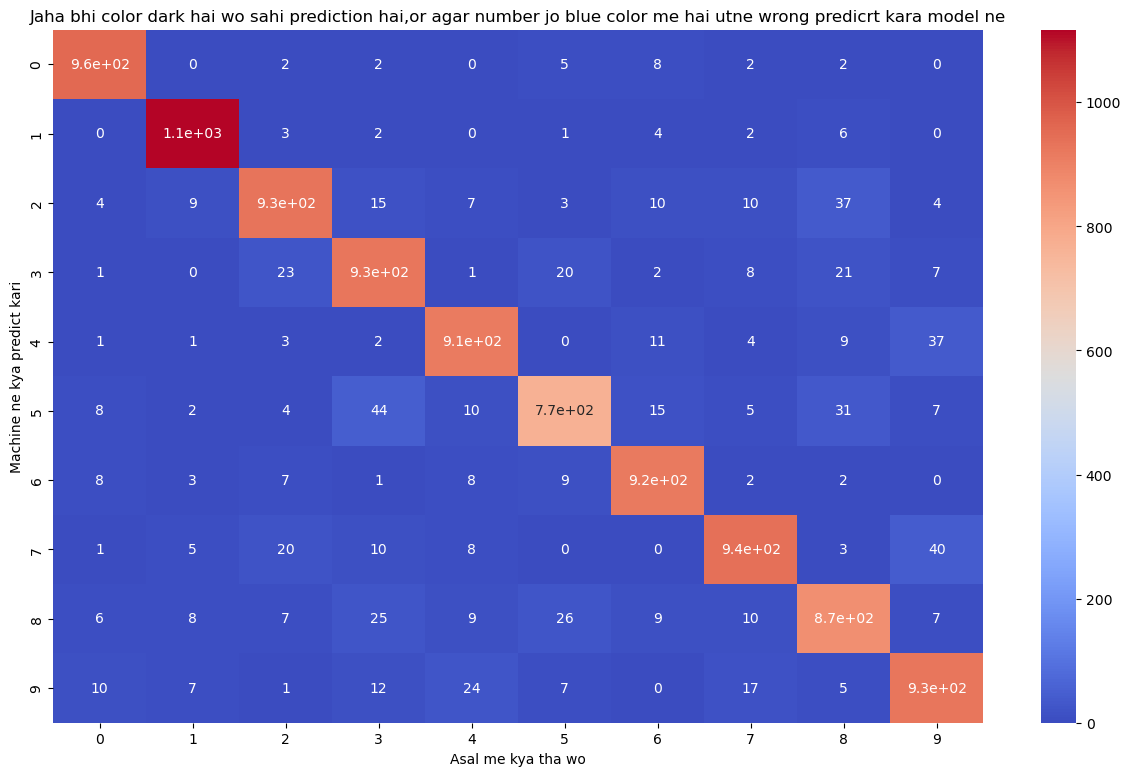

In [41]:
import seaborn  as sns
plt.figure(figsize=(15,9))
sns.heatmap(cm,annot=True,cmap='coolwarm')  #confusionmatrix ko print karre
plt.ylabel("Machine ne kya predict kari")
plt.xlabel("Asal me kya tha wo")
plt.title("Jaha bhi color dark hai wo sahi prediction hai,or agar number jo blue color me hai utne wrong predicrt kara model ne")